In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O4','C4']
psi_dihedral=['C1','O4','C4','C5']

di_sugar=['GLC', 'GLC']
di_sugar2= ['DGlcpa', 'DGlcpa']
link= '1-4'
patterns1= [di_sugar[0]+'(*_*_)]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-'+di_sugar[1]+'(*_*_)',di_sugar[0]+'(*_*_)]-[*]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-[*]-'+di_sugar[1]+'(*_*_)']
patterns2= [di_sugar2[0]+link+di_sugar2[1], di_sugar2[0]+link+']'+di_sugar2[1], di_sugar2[0]+link+'[*]'+di_sugar2[1]]
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-4D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A14', '1A3K', '1A47', '1A47', '1A47', '1A7L', '1A7L', '1ABR', '1ABR', '1AGM', '1AGM', '1AGM', '1AH1', '1AH1', '1AHP', '1AHP', '1AIV', '1ANF', '1APY', '1APZ', '1ATN', '1AX0', '1AX1', '1AX1', '1AX2', '1AX2', '1AXM', '1AXM', '1AXM', '1AXY', '1AXZ', '1AZX', '1AZX', '1B1Y', '1B2Y', '1B2Y', '1B37', '1B3W', '1B5F', '1B5F', '1B5F', '1B5F', '1B9Z', '1B9Z', '1B9Z', '1B9Z', '1BAG', '1BCR', '1BCS', '1BFB', '1BFC', '1BG9', '1BHG', '1BHG', '1BJI', '1BLF', '1BLF', '1BYB', '1BYB', '1BYC', '1BYD', '1BYD', '1BZB', '1BZW', '1BZW', '1BZW', '1BZW', '1C1L', '1C1Z', '1C1Z', '1C1Z', '1C4Q', '1C4Q', '1C4Q', '1C4Q', '1C4Q', '1C4S', '1CAP', '1CB8', '1CDG', '1CDG', '1CDG', '1CF3', '1CF5', '1CF5', '1CGU', '1CGV', '1CGV', '1CGV', '1CGW', '1CGW', '1CGW', '1CGX', '1CGX', '1CGX', '1CGY', '1CGY', '1CGY', '1CIW', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CLY', '1CLZ', '1CPO', '1CPU', '1CPU', '1CQD', '1CQF', '1CQF', '1CQF', '1CQF

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 26 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 26 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 2514 
valid torsion1 and torsion2: (2514, 2514)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['4.C', '3.C'], ['4C1', '4C1'])
(['3.C', '2.C'], ['4C1', '4C1'])
(['2.C', '1.C'], ['4C1', '4C1'])
(['4.D', '3.D'], ['4C1', '4C1'])
(['3.D', '2.D'], ['4C1', '4C1'])
(['2.D', '1.D'], ['4C1', '4C1'])
(['2.H', '1.H'], ['2SO', '-'])
(['2.E', '1.E'], ['-', '-'])
(['2.G', '1.G'], ['4C1', '4C1'])
(['2.F', '1.F'], ['4C1', '4H5'])
(['2.C', '1.C'], ['4C1', '4C1'])
(['3.E', '2.E'], ['4C1', '4C1'])
(['2.E', '1.E'], ['4C1', '4C1'])
(['3.F', '2.F'], ['4C1', '4C1'])
(['2.F', '1.F'], ['4C1', '4C1'])
(['4.G', '3.G'], ['4C1', '4C1'])
(['3.G', '2.G'], ['4C1', '4C1'])
(['2.G', '1.G'], ['4C1', '4C1'])
(['6.B', '5.B'], ['4C1', '4C1'])
(['5.B', '4.B'], ['4C1', '4C1'])
(['4.B', '3.B'], ['4C1', '4C1'])
(['3.B', '2.B'], ['4C1', '4C1'])
(['2.B', '1.B'], ['4C1', '4C1'])
(['2.D', '1.D'], ['4C1', '4C1'])
(['2.F', '1.F'], ['4C1', '4C1'])
(['2.G', '1.G'], ['4C1', '-'])
(['2.D', '1.D'], ['4C1', '4C1'])
(['3.G', '2.G'], ['4C1', '4C1'])
(['3.H', '2.H'], ['4C1', '4C1'])
(['3.J', '2.J'], ['4C1', '4C1'])
(['3.I', '2.I'], [

In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//6dts.pdb C GLC 4 C1
../../pdbs//6dts.pdb C GLC 3 O4
5928 5925
Connection found between 5928 and 5925
../../pdbs//6dts.pdb C GLC 3 C1
../../pdbs//6dts.pdb C GLC 2 O4
5917 5914
Connection found between 5917 and 5914
../../pdbs//6dts.pdb C GLC 2 C1
../../pdbs//6dts.pdb C GLC 1 O4
5906 5903
Connection found between 5906 and 5903
../../pdbs//6dts.pdb D GLC 4 C1
../../pdbs//6dts.pdb D GLC 3 O4
5973 5970
Connection found between 5973 and 5970
../../pdbs//6dts.pdb D GLC 3 C1
../../pdbs//6dts.pdb D GLC 2 O4
5962 5959
Connection found between 5962 and 5959
../../pdbs//6dts.pdb D GLC 2 C1
../../pdbs//6dts.pdb D GLC 1 O4
5951 5948
Connection found between 5951 and 5948
../../pdbs//3pha.pdb H GLC 2 C1
../../pdbs//3pha.pdb H GLC 1 O4
21941 21938
Connection found between(2) 21941 and 21938
../../pdbs//3pha.pdb E GLC 2 C1
../../pdbs//3pha.pdb E GLC 1 O4
21809 21806
Connection found between(2) 21809 and 21806
../../pdbs//3pha.pdb G GLC 2 C1
../../pdbs//3pha.pdb G GLC 1 O4
21897 21894
Connec

In [13]:
outfile_name = di_sugar2[0]+link+di_sugar2[1]

In [14]:
output_df.to_csv(outfile_name+'_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv(outfile_name+'_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [15]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [16]:
output_df

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,6dts.pdb,C GLC 4 C2 C1 GLC 3 O4 C4,C GLC 4 C1 GLC 3 O4 C4 C5,222.125,224.150,"([GLC(4_C_), GLC(3_C_)], [21.42, 14.52])",GLC(4_C_)-GLC(3_C_)-GLC(2_C_)-GLC(1_C_),DGlcpa1-4DGlcpa1-4DGlcpa1-4DGlcpa1-ROH,"([4.C, 3.C], [4C1, 4C1])"
1,6dts.pdb,C GLC 3 C2 C1 GLC 2 O4 C4,C GLC 3 C1 GLC 2 O4 C4 C5,219.626,231.399,"([GLC(3_C_), GLC(2_C_)], [14.52, 13.56])",GLC(4_C_)-GLC(3_C_)-GLC(2_C_)-GLC(1_C_),DGlcpa1-4DGlcpa1-4DGlcpa1-4DGlcpa1-ROH,"([3.C, 2.C], [4C1, 4C1])"
2,6dts.pdb,C GLC 2 C2 C1 GLC 1 O4 C4,C GLC 2 C1 GLC 1 O4 C4 C5,237.788,248.155,"([GLC(2_C_), GLC(1_C_)], [13.56, 15.74])",GLC(4_C_)-GLC(3_C_)-GLC(2_C_)-GLC(1_C_),DGlcpa1-4DGlcpa1-4DGlcpa1-4DGlcpa1-ROH,"([2.C, 1.C], [4C1, 4C1])"
3,6dts.pdb,D GLC 4 C2 C1 GLC 3 O4 C4,D GLC 4 C1 GLC 3 O4 C4 C5,221.343,223.106,"([GLC(4_D_), GLC(3_D_)], [25.15, 15.43])",GLC(4_D_)-GLC(3_D_)-GLC(2_D_)-GLC(1_D_),DGlcpa1-4DGlcpa1-4DGlcpa1-4DGlcpa1-ROH,"([4.D, 3.D], [4C1, 4C1])"
4,6dts.pdb,D GLC 3 C2 C1 GLC 2 O4 C4,D GLC 3 C1 GLC 2 O4 C4 C5,222.539,229.505,"([GLC(3_D_), GLC(2_D_)], [15.43, 14.58])",GLC(4_D_)-GLC(3_D_)-GLC(2_D_)-GLC(1_D_),DGlcpa1-4DGlcpa1-4DGlcpa1-4DGlcpa1-ROH,"([3.D, 2.D], [4C1, 4C1])"
...,...,...,...,...,...,...,...,...,...
2458,5h06.pdb,F GLC 2 C2 C1 GLC 1 O4 C4,F GLC 2 C1 GLC 1 O4 C4 C5,227.369,215.199,"([GLC(2_F_), GLC(1_F_)], [14.62, 16.92])",GLC(2_F_)-GLC(1_F_),DGlcpa1-4DGlcpa1-ROH,"([2.F, 1.F], [4C1, 4C1])"
2459,5h06.pdb,G GLC 2 C2 C1 GLC 1 O4 C4,G GLC 2 C1 GLC 1 O4 C4 C5,229.579,211.682,"([GLC(2_G_), GLC(1_G_)], [12.21, 14.35])",GLC(2_G_)-GLC(1_G_),DGlcpa1-4DGlcpa1-ROH,"([2.G, 1.G], [4C1, 4C1])"
2460,5h06.pdb,H GLC 2 C2 C1 GLC 1 O4 C4,H GLC 2 C1 GLC 1 O4 C4 C5,226.724,215.950,"([GLC(2_H_), GLC(1_H_)], [11.33, 16.12])",GLC(2_H_)-GLC(1_H_),DGlcpa1-4DGlcpa1-ROH,"([2.H, 1.H], [4C1, 4C1])"
2461,5h06.pdb,E GLC 2 C2 C1 GLC 1 O4 C4,E GLC 2 C1 GLC 1 O4 C4 C5,228.191,213.060,"([GLC(2_E_), GLC(1_E_)], [14.01, 16.5])",GLC(2_E_)-GLC(1_E_),DGlcpa1-4DGlcpa1-ROH,"([2.E, 1.E], [4C1, 4C1])"


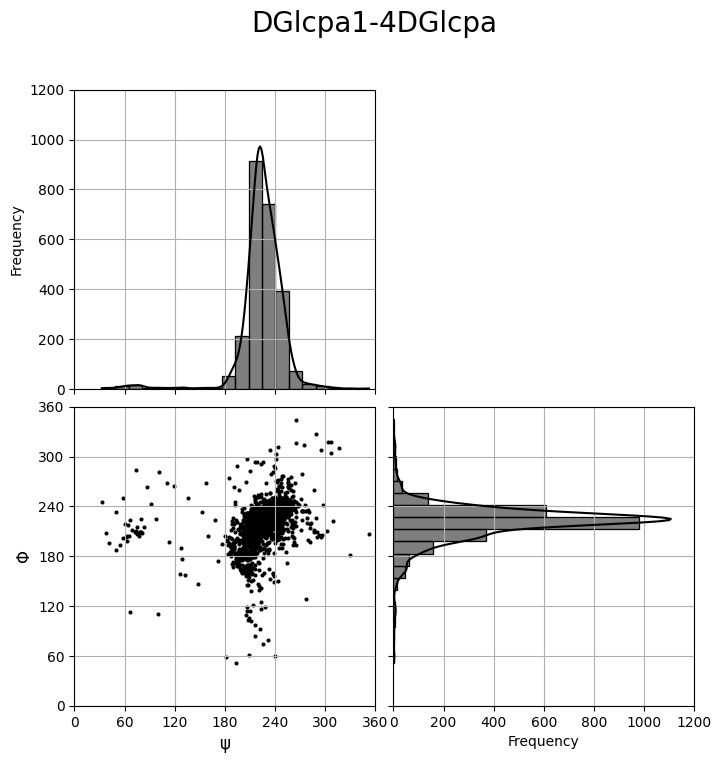

In [20]:
instant1.plot(torsions=output_df, title=outfile_name,max_histogram_scale=1200,step_histogram_tick=200)